# PyTorch Workflow
**end to end**

In [ ]:
what_we_will_do = {1: "Data get and load",
                   2: "Build a model",
                   3: "Fit model to data (Training)",
                   4: "Make predictions",
                   5: "Save and load model"}

In [ ]:
import torch
from torch import nn # nn contains pytorch's building blocks for making neural network
import matplotlib.pyplot as plt


torch.__version__

'2.3.0+cu121'

# Data Preparing and Loading
* Data can be anything in machine learning
* Turning data into numbers or numerical representation
* Building a model to find pattern in those numbers or representations

#Linear Regression
#weight, bias       
#Y = bias + weightX

In [ ]:
import torch

weight = 0.7 # We know these numbers weight and bias. We want to estimate these numbers. How? using following
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # Giving a x sample values to generate y

# Linear Regression
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

# Splitting Data Into Training Data and Test Data
* There are three types of data sets. Training, Validation and Testing
* Usually 80 - 20 ratio is used for Training and testing


In [ ]:
train_split = int(0.8 * len(X))
train_split

40

In [ ]:
X_train, y_train = X[:train_split], y[:train_split] # Training features and training labels
len(X_train), len(y_train)



(40, 40)

In [ ]:
X_test, y_test = X[train_split:], y[train_split:] # Testing features and testing labels
len(X_test), len(y_test)

(10, 10)

# Data Visualizing
* Training data comparison against training labels
* Test data comparison against test labels
* Test data comparison against predictions that our model will make

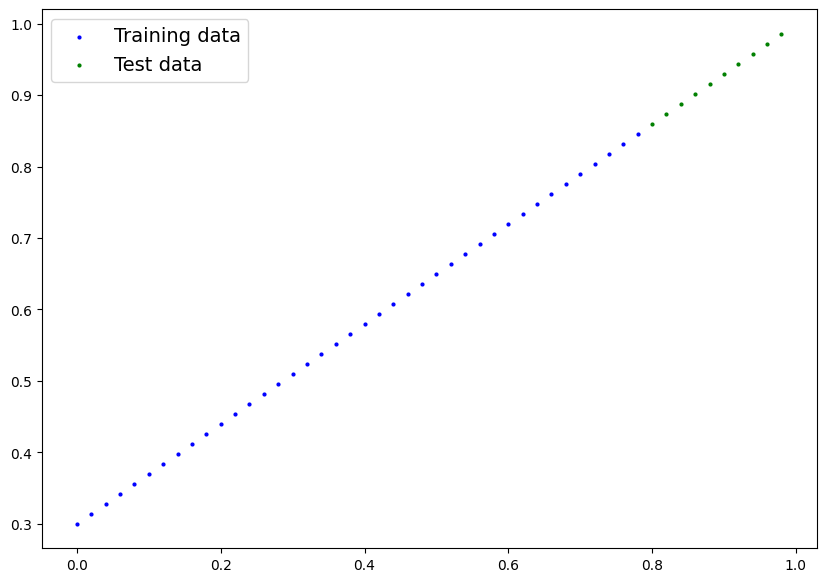

In [ ]:
def plot_predictions(training_data = X_train, training_labels = y_train,
                     testing_data = X_test, testing_labels = y_test, predictions = None):

  """ Plot predictions """

  plt.figure(figsize=(10, 7))

  #Plot training data and labels
  plt.scatter(training_data, training_labels, c = "b", s = 4, label = "Training data")
  plt.scatter(testing_data, testing_labels, c = "g", s = 4, label = "Test data")

  # Compare test data against predictions
  if predictions is not None:
    plt.scatter(testing_data, predictions, c = "r", s = 4, label = "Predictions")

  plt.legend(prop = {"size" : 14})

plot_predictions()

# Building Our Model NN MODULE
# Linear Regression Model

# What following model basically does it that it initialize with random weight and bias values.
# Through computational part ot the code i.e. forward method. we feed training data x to the model.
# Since gradient descent is enabled on parameters with the help of training data our model readjusts the weight and bias values
# so that the weight and bias values gets as close to the values that were used to create training data.
# In other words learn them

In [ ]:
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias




# What is inside our model. Knowing through parameters()  and state_dict()


In [ ]:
# Lets create a random seed for reproducibility
torch.manual_seed(42)

# Creating an instance of our model. Recall that it inherits from nn.Module superclass of all CNNs in pytorch
model_0 = LinearRegressionModel()

#Accessing the parameters
list(model_0.parameters())

#Using state_dict
model_0.state_dict()



OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Ideal values of weight and bias
weight, bias

(0.7, 0.3)

#Goal is to train model using training data through x, so that the model's parameters/weight & bias after training
#session gets as close as possible to ideal values in our case 0.7 and 0.3. Note in many cases ideal values are not known
#Also remember we start from random parameters initially and adjust them to reach ideal values.
#This achieving of parameters to ideal values is done using optimizers (GD, BP) hence we set GD value = TRUE in above model

# Pytorch Inference mode. Good way to test our model as it doesnt keep track of gradiant which removes
# overhead

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
# Without inference mode we get an extra gradient tracking which will add extra overhead for large sets
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

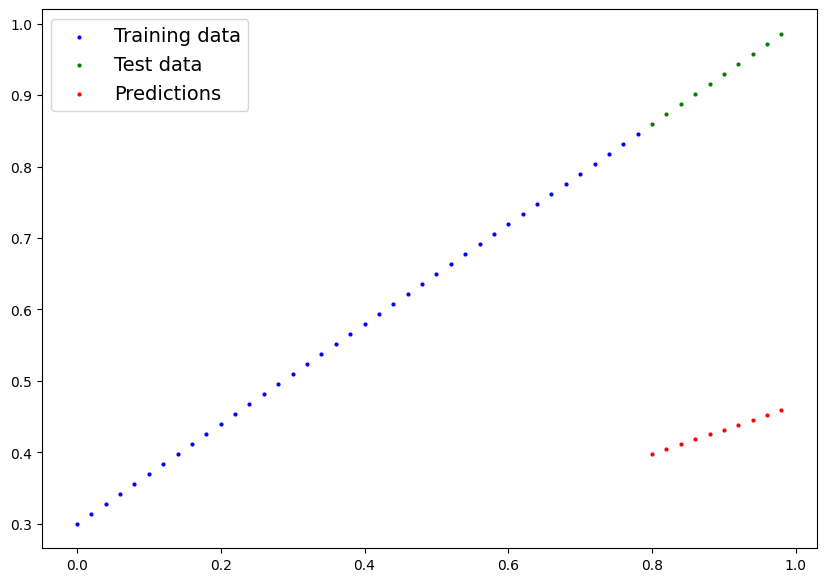

In [ ]:
plot_predictions(predictions = y_preds)

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Loss Function : That measures how wrong our model predictions are wrt to ideal predictions. Lower the better
## Optimizer: Takes into account of loss function and readjusts parameters so that minimize the loss

In [ ]:
# Loss Function
loss_fn = nn.L1Loss()


# Optimizer (Stochastic Gradient Descent)
# lr is learning rate i.e. step to achieve parameter optimization smaller rate means smaller change in parameter while larger rate means larger change in parameter
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)


# Let's implement a training loop


# Steps in training loop are as follows


# 1) Loop through training data
# 2) In each iteration perform first the forward pass or forward propogation with the training data
# 3) This will generate predications and compute loss function on them
# 4) After this set optimizer to zero grad
# 5) Now perform backward pass or backpropogation.
# 6) Finally perform gradient descent with optimizer step()

# Upto step 3 things are pretty obvious, However from 3 onwards what actually happens is that in backpass
# gradient of model's parameters is taken and considering the loss function or with respect to
# loss function these gradients minimized and what that yields in given step is that it will minimize
# the loss function itself


In [ ]:
torch.manual_seed(42)

epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_0.train()

  # Perform forward pass with X data
  y_pred = model_0.forward(X_train)

  # Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"loss:{loss}")

  # Set zero grad
  optimizer.zero_grad()

  #Perform backpass on loss
  loss.backward()

  #Perform gradient descent
  optimizer.step()

  model_0.eval()

  #Testing Loop
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:

      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)

      print(model_0.state_dict())
      print(f"epoch:{epoch} loss:{loss} test_loss:{test_loss}")


loss:0.31288138031959534
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
epoch:0 loss:0.31288138031959534 test_loss:0.48106518387794495
loss:0.3013603389263153
loss:0.28983935713768005
loss:0.2783183455467224
loss:0.26679736375808716
loss:0.2552763521671295
loss:0.24375534057617188
loss:0.23223432898521423
loss:0.22071333229541779
loss:0.20919232070446014
loss:0.1976713240146637
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
epoch:10 loss:0.1976713240146637 test_loss:0.3463551998138428
loss:0.18615034222602844
loss:0.1746293306350708
loss:0.16310831904411316
loss:0.1515873372554779
loss:0.14006635546684265
loss:0.1285453587770462
loss:0.11702437698841095
loss:0.1060912236571312
loss:0.09681284427642822
loss:0.08908725529909134
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
epoch:20 loss:0.08908725529909134 test_loss:0.21729660034179688
loss:0.08227583020925522
loss:0.07638873159885406
loss:0.07160007208585739


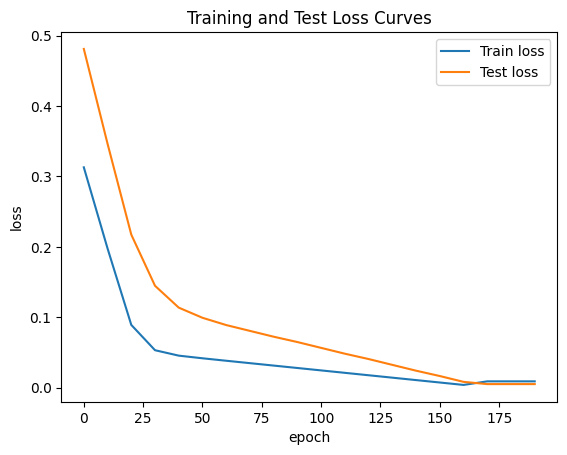

In [ ]:
#Plotting Loss and test loss wrt epoch
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss" )
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and Test Loss Curves")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

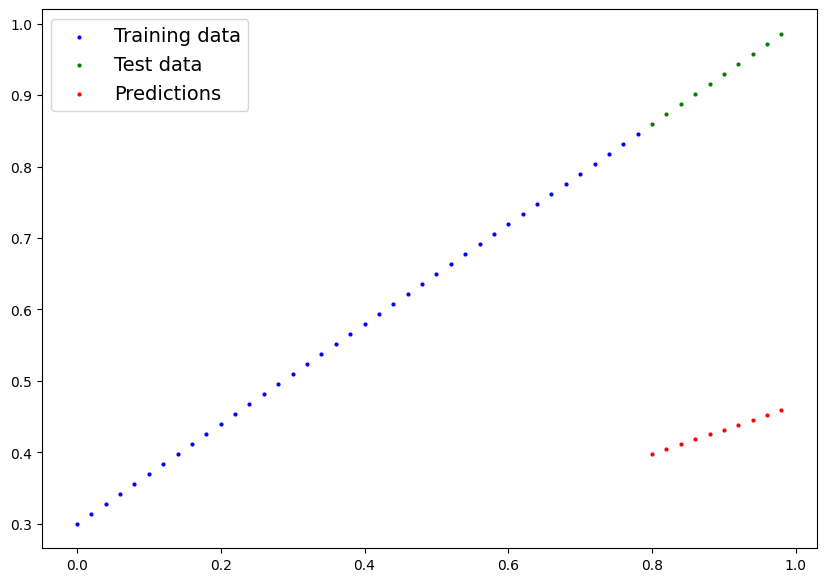

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight, bias

(0.7, 0.3)

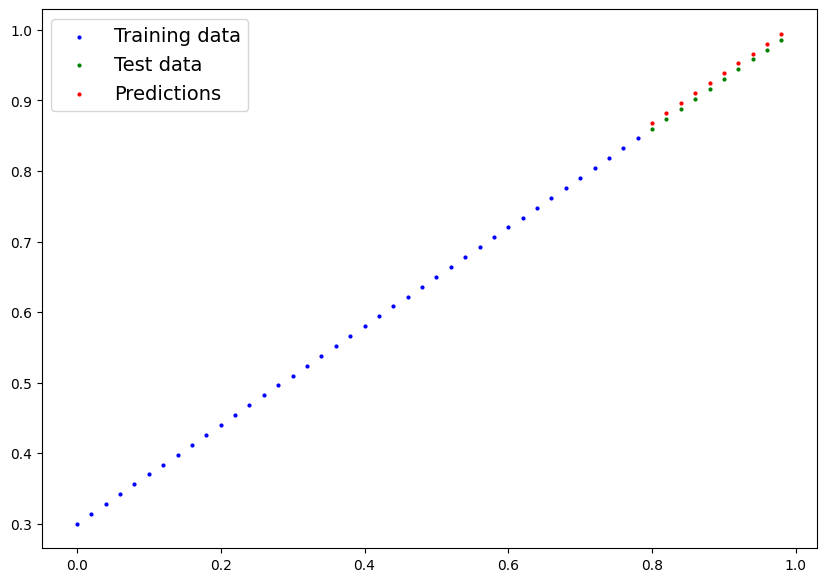

In [ ]:
plot_predictions(predictions=y_preds_new)

# SAVING OUR MODEL USING RECOMMENDED APPROACH OF SAVING MODEL_STATE_DICT

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 May 25 09:40 01_pytorch_workflow_model_0.pth
